# Salary Dataset

## Column Description:

* Age, a numerical column
* Gender, a categorical column
* Education Level, a categorical column
* Job Title, a categorical column
* Years of Experience, a numerical column
* Salary, a numerical column

#### About Dataset:
This dataset is downloaded from Kaggle. It contains a company's data including  employee information such as age, gender, education level, years of experience and salary. It contains 6 columns and 6700 entries. This dataset is used to built an Machine Learning Pipeline.

### Import Libraries

In [427]:
# To handle Data
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# Import iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# For Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, precision_score, mean_squared_error, r2_score

# For Classification\Regression Tasks
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from scipy import stats

# Warnings
import warnings
warnings.filterwarnings('ignore')

### Import Datasets

In [428]:
# Import Dataset
p1 = pd.read_csv("C:\\Users\\Faizan\\Desktop\\Faizan Folder\\Excel Data\\Salary_Data (Autosaved).csv")
p1

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,NaN,5.0,NaN
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,NaN,PhD,NaN,NaN,150000.0
3,36.0,NaN,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,8.0,200000.0
...,...,...,...,...,...,...
6698,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6699,32.0,Male,High School,Sales Associate,3.0,50000.0
6700,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6701,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


## Assesing Data (EDA)

In [429]:
p1.describe()

,Age,Years of Experience,Salary
count,6700.000000,6699.000000,6697.000000
mean,33.620597,8.090834,115296.421831
std,7.615514,6.054840,52811.311911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [430]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6703 entries, 0 to 6702
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6700 non-null   float64
 1   Gender               6700 non-null   object 
 2   Education Level      6700 non-null   object 
 3   Job Title            6700 non-null   object 
 4   Years of Experience  6699 non-null   float64
 5   Salary               6697 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.3+ KB


In [431]:
p1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,NaN,5.0,NaN
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,NaN,PhD,NaN,NaN,150000.0
3,36.0,NaN,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,8.0,200000.0


In [432]:
p1.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6698,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6699,32.0,Male,High School,Sales Associate,3.0,50000.0
6700,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6701,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6702,26.0,Female,High School,Sales Executive,1.0,35000.0


In [433]:
p1.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [434]:
p1.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              193
Years of Experience     37
Salary                 446
dtype: int64

#### Explore Age Column:

In [435]:
p1["Age"].nunique()

41

Mean :  33.62059701492537
Median :  32.0
Mode :  27.0


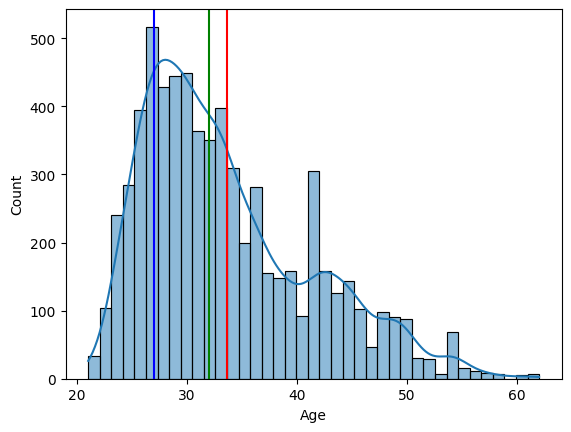

In [436]:
sns.histplot(p1["Age"], kde = True)
plt.axvline(p1["Age"].mean(), color="Red")
plt.axvline(p1["Age"].median(), color="Green")
plt.axvline(p1["Age"].mode()[0], color="Blue")

# Print 
print("Mean : ", p1["Age"].mean())
print("Median : ", p1["Age"].median())
print("Mode : ", p1["Age"].mode()[0])

<Axes: xlabel='Age', ylabel='Count'>

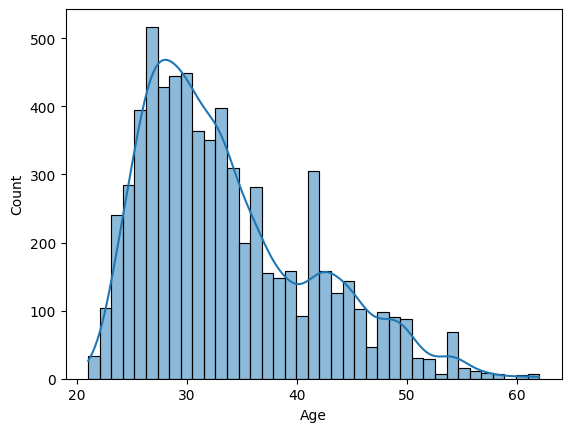

In [437]:
sns.histplot(p1, x=p1["Age"],kde=1)

In [438]:
stats.shapiro(p1["Age"])

ShapiroResult(statistic=nan, pvalue=1.0)

<Axes: ylabel='Age'>

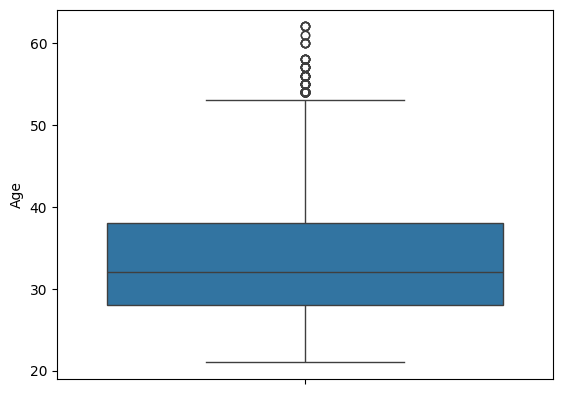

In [439]:
sns.boxplot(p1["Age"])

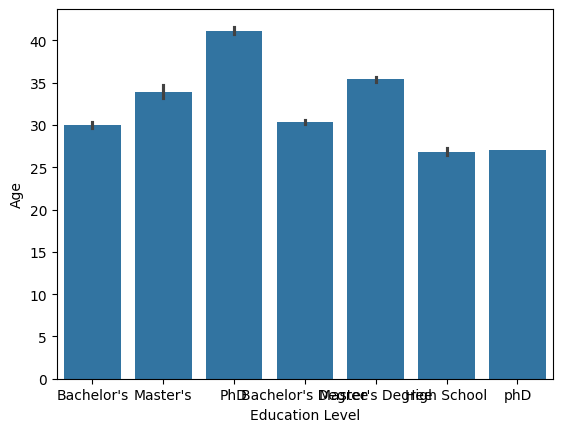

<Figure size 1000x2000 with 0 Axes>

In [440]:
sns.barplot(data=p1, x ="Education Level", y="Age")
plt.figure(figsize=(10, 20))
plt.show()

#### Explore Salary Column


In [441]:
p1["Salary"].nunique()

446

Mean :  115296.42183067044
Median :  115000.0
Mode :  140000.0


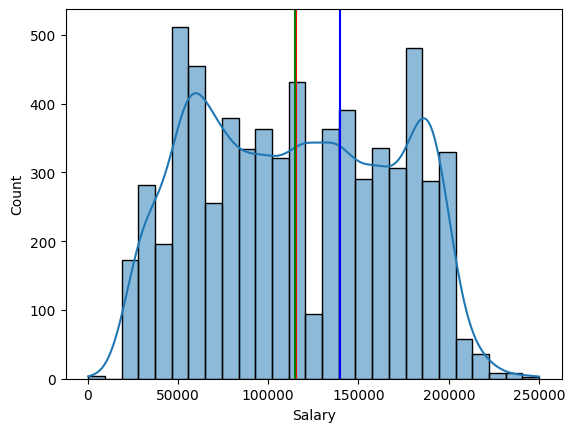

In [442]:
sns.histplot(p1["Salary"], kde = True)
plt.axvline(p1["Salary"].mean(), color="Red")
plt.axvline(p1["Salary"].median(), color="Green")
plt.axvline(p1["Salary"].mode()[0], color="Blue")

# Print 
print("Mean : ", p1["Salary"].mean())
print("Median : ", p1["Salary"].median())
print("Mode : ", p1["Salary"].mode()[0])

In [443]:
stats.shapiro(p1["Salary"])

ShapiroResult(statistic=nan, pvalue=1.0)

<Axes: ylabel='Salary'>

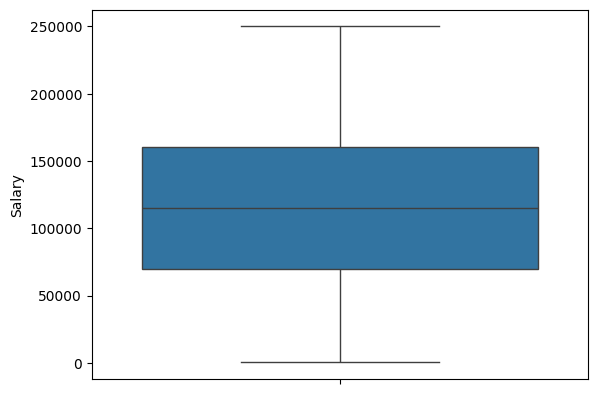

In [444]:
sns.boxplot(p1["Salary"])

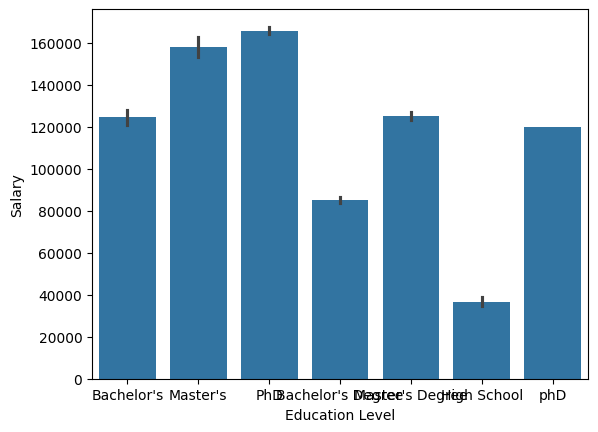

<Figure size 1000x2000 with 0 Axes>

In [445]:
sns.barplot(data=p1, x ="Education Level", y="Salary")
plt.figure(figsize=(10, 20))
plt.show()

#### Explore Years of Experience Column

In [446]:
p1["Years of Experience"].unique()

array([ 5. ,  3. ,  nan,  7. ,  8. , 12. ,  4. ,  1. , 10. , 18. ,  6. ,
       14. , 16. ,  0. ,  2. ,  9. , 13. , 11. , 15. , 25. , 20. , 21. ,
       22. , 19. , 17. , 23. , 24. ,  0.5,  1.5, 31. , 30. , 28. , 33. ,
       27. , 34. , 29. , 26. , 32. ])

<Axes: xlabel='Years of Experience', ylabel='Count'>

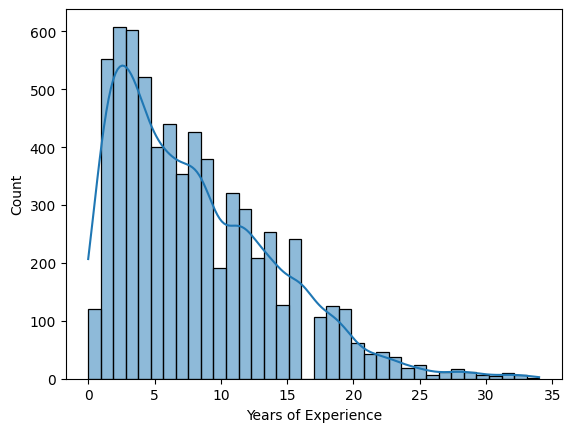

In [447]:
sns.histplot(p1, x=p1["Years of Experience"],kde=1)

In [448]:
stats.shapiro(p1["Years of Experience"])

ShapiroResult(statistic=nan, pvalue=1.0)

<Axes: ylabel='Years of Experience'>

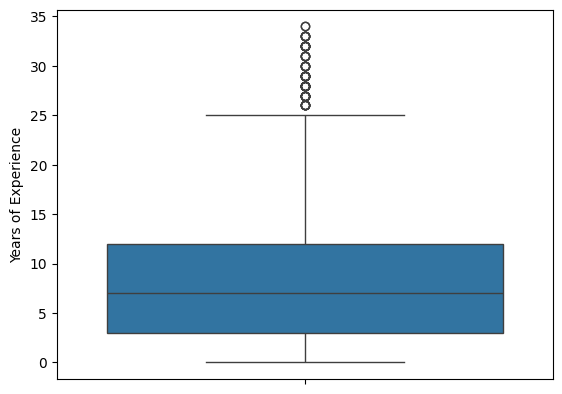

In [449]:
sns.boxplot(p1["Years of Experience"])

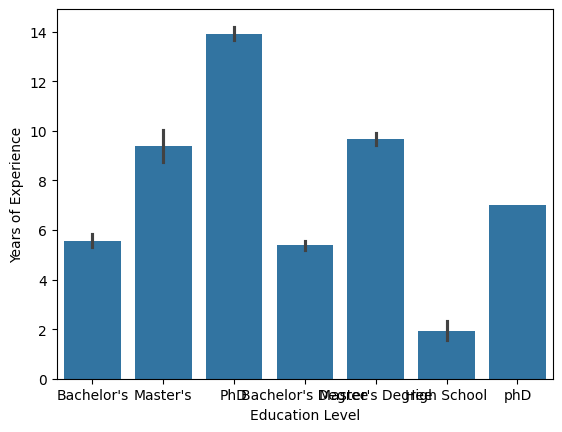

<Figure size 1000x2000 with 0 Axes>

In [450]:
sns.barplot(data=p1, x ="Education Level", y="Years of Experience")
plt.figure(figsize=(10, 20))
plt.show()

#### Explore Gender & Education Level Column

In [451]:
p1["Gender"].unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

In [452]:
p1.groupby('Gender')['Education Level'].value_counts()

Gender  Education Level  
Female  Bachelor's Degree     915
        Master's Degree       869
        PhD                   496
        Bachelor's            283
        High School           251
        Master's              198
Male    Bachelor's Degree    1352
        PhD                   871
        Master's Degree       702
        Bachelor's            472
        High School           185
        Master's               89
        phD                     1
Other   High School            12
        Master's Degree         2
Name: count, dtype: int64

In [453]:
def standardize_education_level(edu_level: str) -> str:
    edu_lower = edu_level.lower()  # Convert to lowercase for case-insensitive comparison
    if edu_lower in ["bachelor's", "bachelor's degree"]:
        return "Bachelor's"
    elif edu_lower in ["master's", "master's degree"]:
        return "Master's"
    elif edu_lower in ["phd"]:
        return "PhD"
    else:
        return edu_level  # Return the original value if it doesn't match any of the specified categories

p1['Education Level'] = p1['Education Level'].astype(str)  # Convert the values to strings

p1['Education Level'] = p1['Education Level'].apply(standardize_education_level)

print("Updated p1 DataFrame:")
print(p1)



Updated p1 DataFrame:
       Age  Gender Education Level              Job Title  \
0     32.0    Male      Bachelor's                    NaN   
1     28.0  Female        Master's           Data Analyst   
2     45.0     NaN             PhD                    NaN   
3     36.0     NaN      Bachelor's        Sales Associate   
4     52.0    Male        Master's               Director   
...    ...     ...             ...                    ...   
6698  49.0  Female             PhD  Director of Marketing   
6699  32.0    Male     High School        Sales Associate   
6700  30.0  Female      Bachelor's      Financial Manager   
6701  46.0    Male        Master's      Marketing Manager   
6702  26.0  Female     High School        Sales Executive   

      Years of Experience    Salary  
0                     5.0       NaN  
1                     3.0   65000.0  
2                     NaN  150000.0  
3                     7.0   60000.0  
4                     8.0  200000.0  
...              

In [454]:
p1.groupby('Gender')['Education Level'].value_counts()

Gender  Education Level
Female  Bachelor's         1198
        Master's           1067
        PhD                 496
        High School         251
        nan                   1
Male    Bachelor's         1824
        PhD                 872
        Master's            791
        High School         185
        nan                   1
Other   High School          12
        Master's              2
Name: count, dtype: int64

In [455]:
p1['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', 'nan', 'High School'],
      dtype=object)

### Checking the Distribution of the Whole Dataset

<Axes: xlabel='Age', ylabel='Gender'>

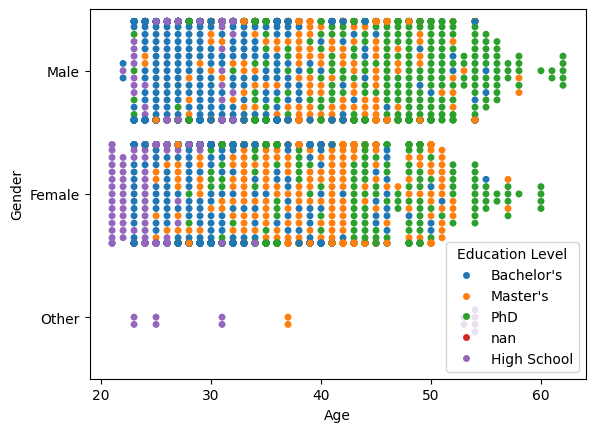

In [456]:
sns.swarmplot(data = p1, x='Age', y='Gender', hue='Education Level' )

<Axes: xlabel='Years of Experience', ylabel='Gender'>

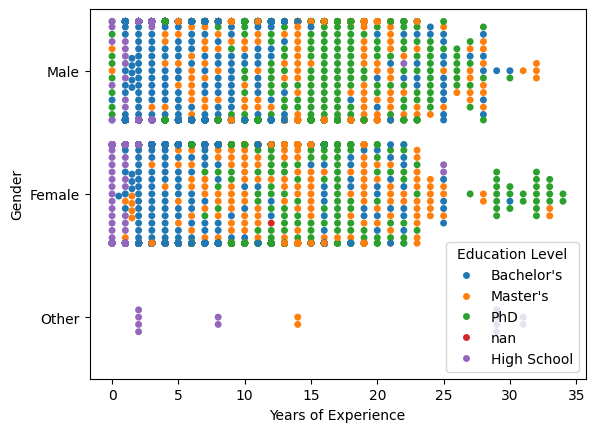

In [457]:
sns.swarmplot(data = p1, x='Years of Experience', y='Gender', hue='Education Level' )

<Axes: xlabel='Salary', ylabel='Gender'>

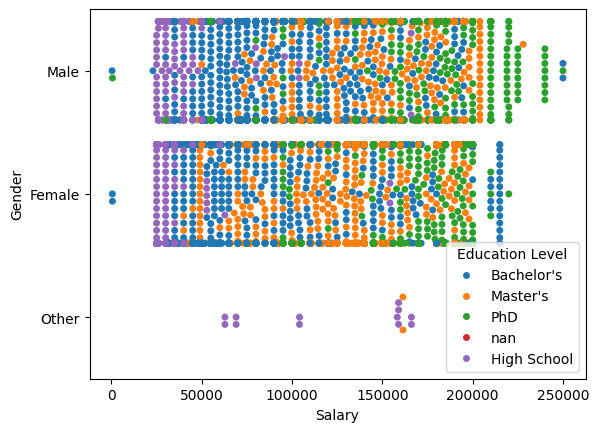

In [458]:
sns.swarmplot(data = p1, x='Salary', y='Gender', hue='Education Level' )

## Cleaning Data

In [459]:
p1.isnull().sum() / len(p1) * 100

Age                    0.044756
Gender                 0.044756
Education Level        0.000000
Job Title              0.044756
Years of Experience    0.059675
Salary                 0.089512
dtype: float64

#### Imputation

In [460]:
from sklearn.preprocessing import LabelEncoder

label_encoder_education = LabelEncoder()
p1['Education Level'] = label_encoder_education.fit_transform(p1['Education Level'])

label_encoder_gender = LabelEncoder()
p1['Gender'] = label_encoder_gender.fit_transform(p1['Gender'])


In [461]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
p1[['Age', 'Years of Experience', 'Salary', 'Gender']] = imputer.fit_transform(p1[['Age', 'Years of Experience', 'Salary', 'Gender']])

In [462]:
p1.isnull().sum() / len(p1) * 100

Age                    0.000000
Gender                 0.000000
Education Level        0.000000
Job Title              0.044756
Years of Experience    0.000000
Salary                 0.000000
dtype: float64

In [463]:
p1.drop(['Job Title'], axis=1, inplace =True)  # axis=1 for columns, axis=0 for rows

#### Outlier Removal of Age Column

<Axes: ylabel='Age'>

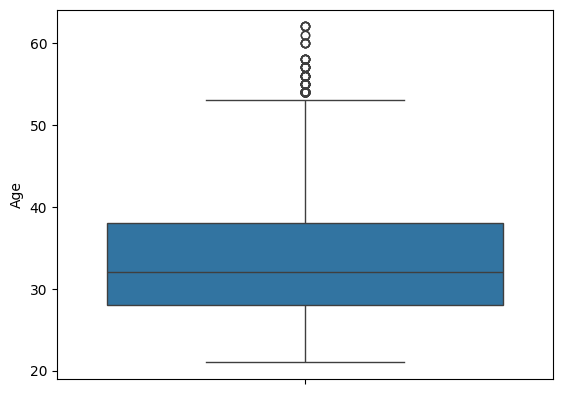

In [464]:
# Ouliers removal
sns.boxplot(p1["Age"])

In [465]:
Q1 = p1["Age"].quantile(0.25) 
Q3 = p1["Age"].quantile(0.75) 
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
p1= p1[(p1["Age"] > lower_bound) & (p1["Age"] < upper_bound)] ## Means that the data which have to be taken is is between max and min line

<Axes: ylabel='Age'>

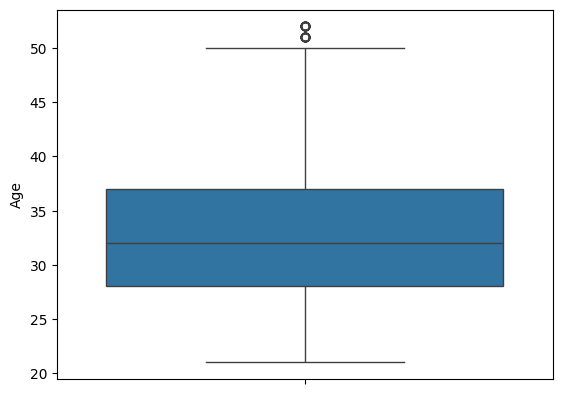

In [466]:
sns.boxplot(p1["Age"])

#### Outlier Removal of Years of Experience Column

<Axes: ylabel='Years of Experience'>

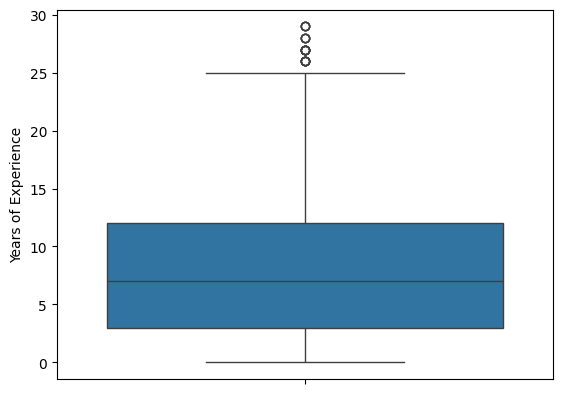

In [467]:
sns.boxplot(p1["Years of Experience"])

In [468]:
Q1 = p1["Years of Experience"].quantile(0.25) 
Q3 = p1["Years of Experience"].quantile(0.75) 
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
p1= p1[(p1["Years of Experience"] > lower_bound) & (p1["Years of Experience"] < upper_bound)] ## Means that the data which have to be taken is is between max and min line

#### Checking the Outliers in Salary Column

<Axes: ylabel='Salary'>

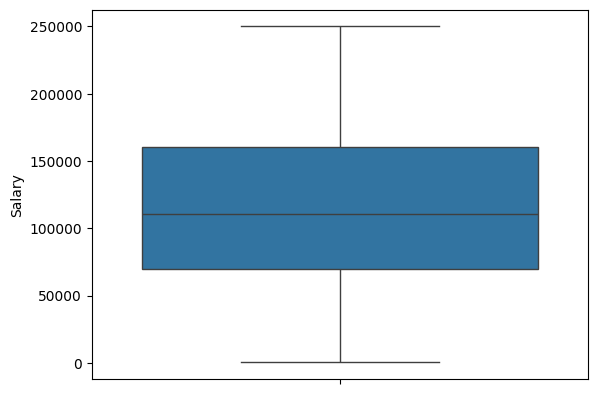

In [469]:
sns.boxplot(p1["Salary"])

#### Data Dispersion of Numerical columns(Age, Salary, Years of Experience)

<Axes: xlabel='Age', ylabel='Count'>

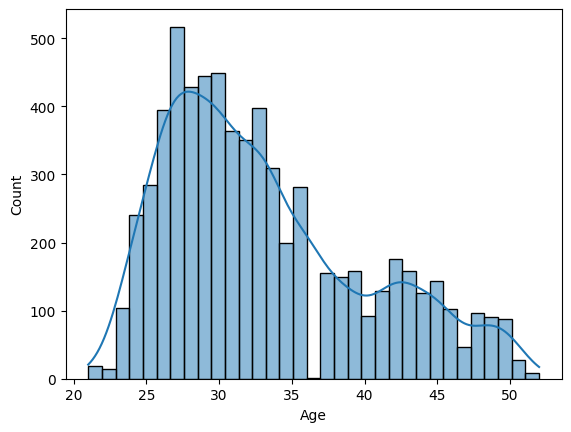

In [470]:
sns.histplot(p1["Age"],kde=1)

<Axes: xlabel='Salary', ylabel='Count'>

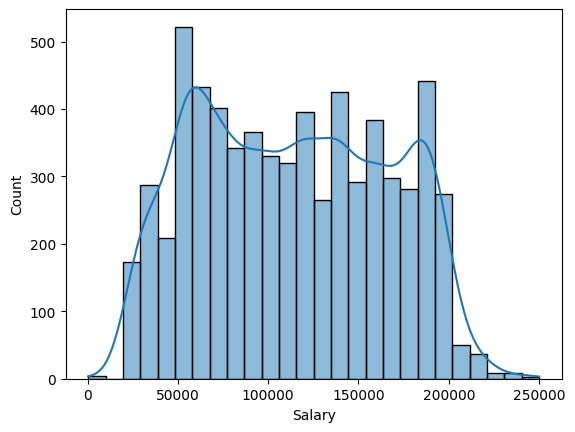

In [471]:
sns.histplot(p1["Salary"],kde=1)

<Axes: xlabel='Years of Experience', ylabel='Count'>

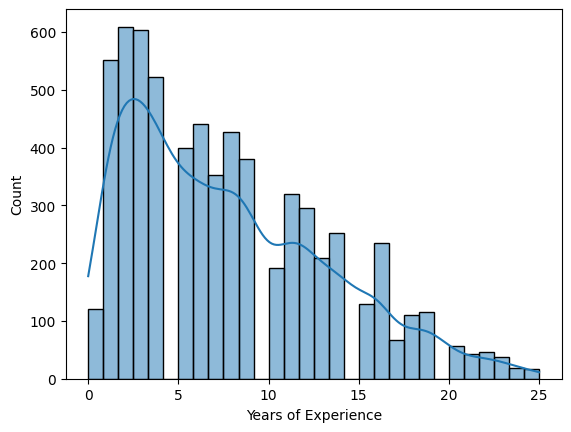

In [472]:
sns.histplot(p1["Years of Experience"],kde=1)

In [473]:
p1.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Years of Experience    0
Salary                 0
dtype: int64

In [474]:
p1.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,1.0,0,5.0,103000.0
1,28.0,0.0,2,3.0,65000.0
2,45.0,3.0,3,15.4,150000.0
3,36.0,3.0,0,7.0,60000.0
4,52.0,1.0,2,8.0,200000.0


In [475]:
p1.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,1.0,0,5.0,103000.0
1,28.0,0.0,2,3.0,65000.0
2,45.0,3.0,3,15.4,150000.0
3,36.0,3.0,0,7.0,60000.0
4,52.0,1.0,2,8.0,200000.0


In [476]:
p1.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,1.0,0,5.0,103000.0
1,28.0,0.0,2,3.0,65000.0
2,45.0,3.0,3,15.4,150000.0
3,36.0,3.0,0,7.0,60000.0
4,52.0,1.0,2,8.0,200000.0


## Statistcal Analysis

\\ Null Hypothesis: Data is Normal

\\ Alternate Hypothesis: Data is not Normal

#### Transforming Data

p-value: 4.2132939443033307e-47. Sample does not look Gaussian/Normally distributed (Reject H0)
p-value: 1.5849284749602607e-47. Sample does not look Gaussian/Normally distributed (Reject H0)
p-value: 2.0184733525962322e-38. Sample does not look Gaussian/Normally distributed (Reject H0)


,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,1.0,0,5.0,103000.0
1,28.0,0.0,2,3.0,65000.0
2,45.0,3.0,3,15.4,150000.0
3,36.0,3.0,0,7.0,60000.0
4,52.0,1.0,2,8.0,200000.0


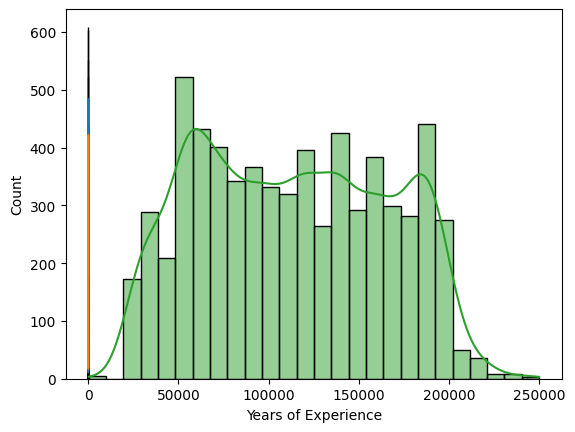

In [477]:
sns.histplot(p1["Years of Experience"], kde=1)

sns.histplot(p1["Age"], kde=1)

sns.histplot(p1["Salary"], kde=1)

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(p1["Age"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(p1["Years of Experience"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(p1["Salary"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')
p1.head()

In [478]:
x= p1[['Age']]
y= p1[['Years of Experience']]
z= p1[['Salary']]

In [479]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

qt_normal = QuantileTransformer(output_distribution='normal')

# Apply Quantile transformation
p1['Quantile_X'] = qt_normal.fit_transform(x.values.reshape(-1, 1))
p1['Quantile_Y'] = qt_normal.fit_transform(y.values.reshape(-1, 1))
p1['Quantile_Z'] = qt_normal.fit_transform(z.values.reshape(-1, 1))

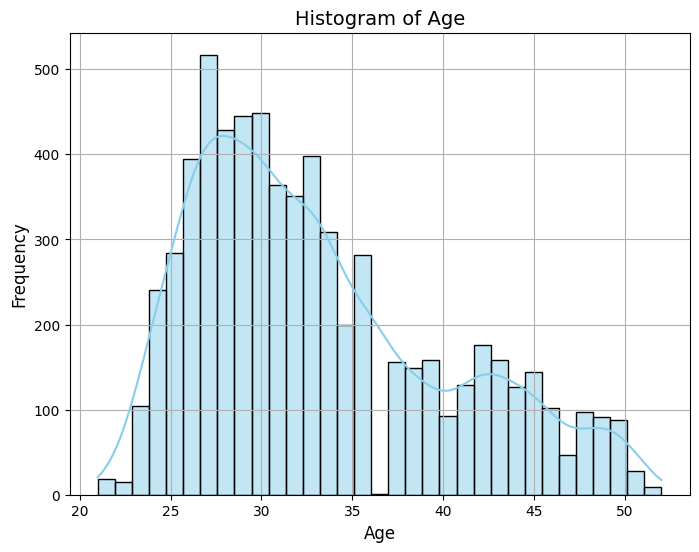

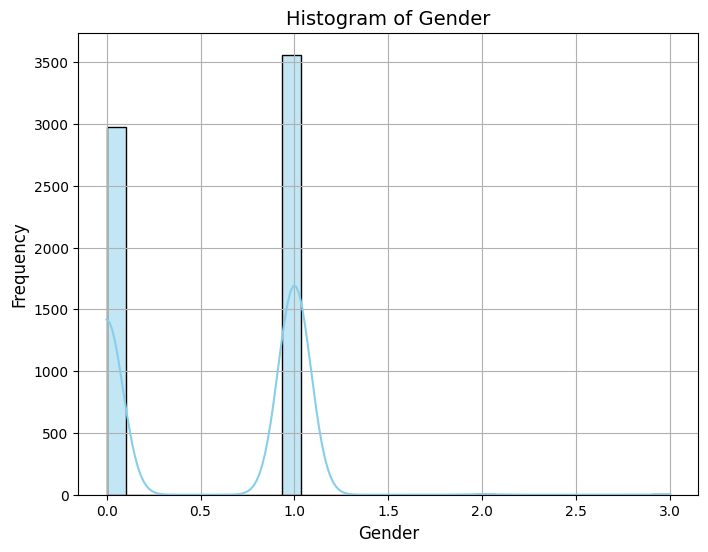

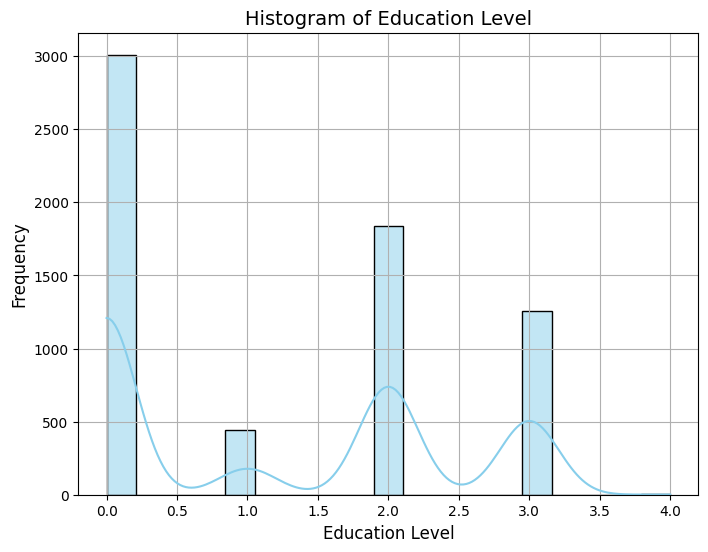

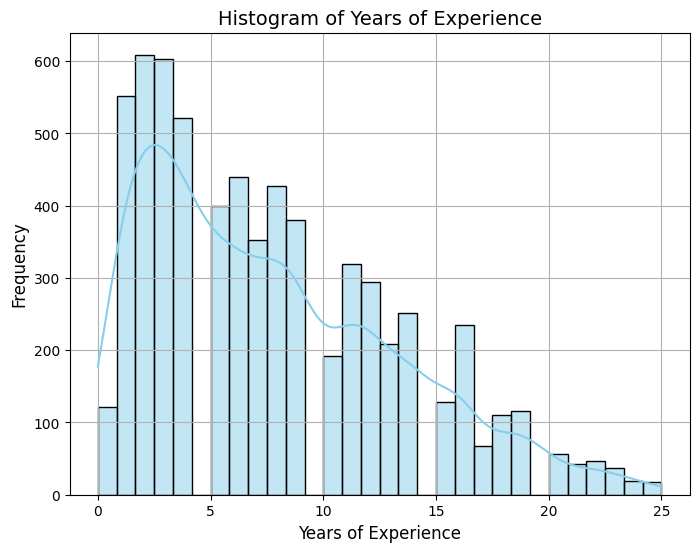

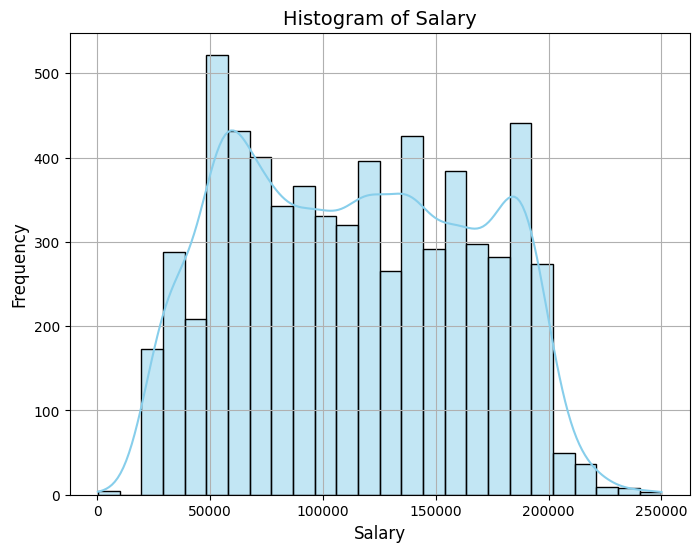

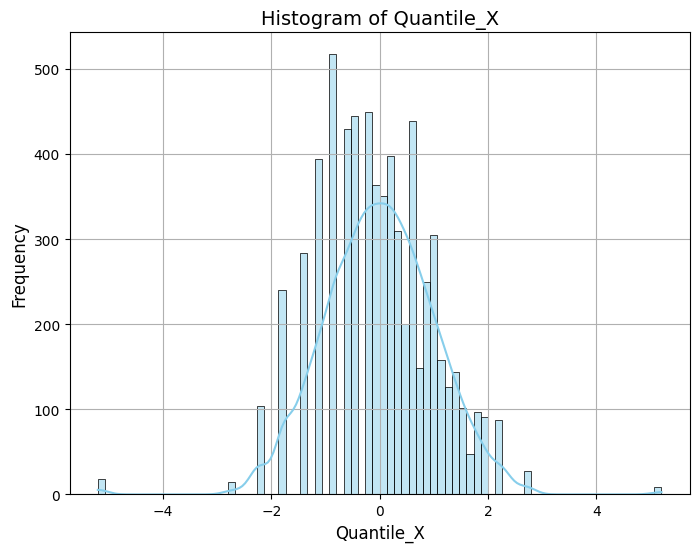

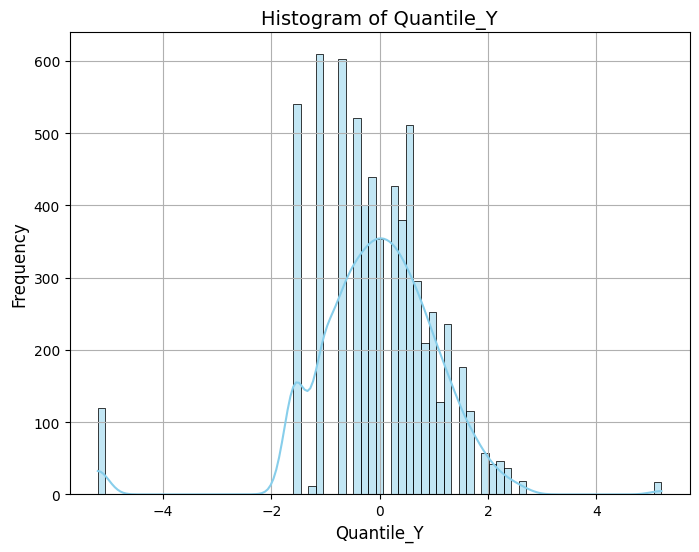

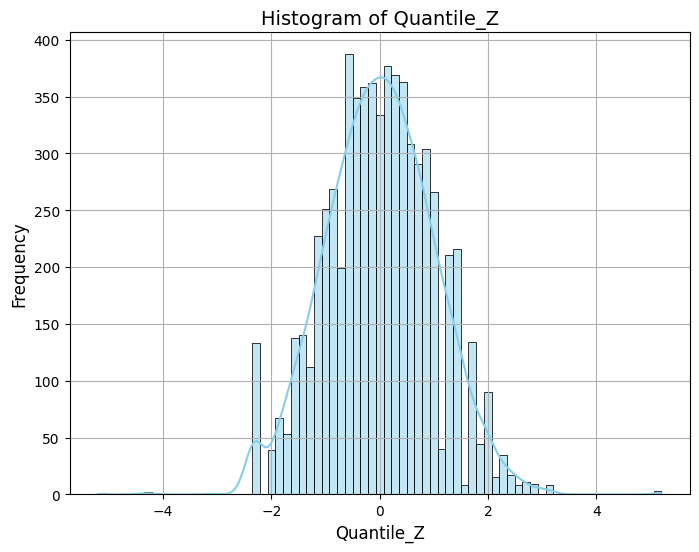

In [480]:

for column in p1.columns:
    # Create a new figure for each column
    plt.figure(figsize=(8, 6))
    
    # Draw histogram plot with KDE for the column using seaborn's distplot
    sns.histplot(p1[column], kde=True, color='skyblue', edgecolor='black')
    
    # Set title and labels
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Show grid
    plt.grid(True)
    
    # Show plot
    plt.show()

#### Levene Test

\\ Null Hypothesis: Data is Homoginous

\\ Alternate Hypothesis: Data is not Homoginous

In [481]:
import scipy.stats as stats
import pandas as pd

# Assuming you have already loaded your data into the p1 DataFrame

# Extract 'Age' and 'Fare' columns from the p1 DataFrame
age_column = p1['Age']
experience_column = p1['Years of Experience']
salary_column = p1['Salary']



# Perform Levene Test
w_stat, p_val = stats.levene(age_column, experience_column, salary_column)

print("w_statistic:", w_stat)
print("p-value:", p_val)

if p_val < 0.05:  # Assuming alpha level of 0.05
    print(f"Variances are equal: Fail to Reject the null hypothesis")
else:
    print(f"Variances are not equal: Reject the null hypothesis")

w_statistic: 19165.525418329173
p-value: 0.0
Variances are equal: Fail to Reject the null hypothesis


#### Chi-Squared Test

In [482]:
contigency_table = pd.crosstab(p1["Gender"], p1["Education Level"])
contigency_table

Education Level,0,1,2,3,4
Gender,,,,,
0.0,1197,251,1063,467,1
1.0,1812,185,774,788,1
2.0,0,6,2,0,0
3.0,1,0,0,1,1


In [483]:
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)

# Print
print("Chi_Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected:", expected)

Chi_Square Statistic: 1001.2734288773636
p-value: 9.977463228957398e-207
Degrees of Freedom: 12
Expected: [[1.36897557e+03 2.01025649e+02 8.36394046e+02 5.71240305e+02
  1.36442748e+00]
 [1.63596947e+03 2.40232061e+02 9.99517557e+02 6.82650382e+02
  1.63053435e+00]
 [3.67633588e+00 5.39847328e-01 2.24610687e+00 1.53404580e+00
  3.66412214e-03]
 [1.37862595e+00 2.02442748e-01 8.42290076e-01 5.75267176e-01
  1.37404580e-03]]


#### Wilcoxon(Paired Sampling)

In [484]:

from scipy.stats import wilcoxon

# Extract the columns from the p1 DataFrame
age_column = p1['Age']
experience_column = p1['Years of Experience']
salary_column = p1['Salary']

# Perform Wilcoxon signed-rank test between 'Age' and 'Years of Experience'
statistic_1, p_val_1 = wilcoxon(age_column, experience_column)
print("Test statistic between Age and Years of Experience:", statistic_1)
print("p-value between Age and Years of Experience:", p_val_1)

# Perform Wilcoxon signed-rank test between 'Age' and 'Salary'
statistic_2, p_val_2 = wilcoxon(age_column, salary_column)
print("\nTest statistic between Age and Salary:", statistic_2)
print("p-value between Age and Salary:", p_val_2)

# Perform Wilcoxon signed-rank test between 'Years of Experience' and 'Salary'
statistic_3, p_val_3 = wilcoxon(experience_column, salary_column)
print("\nTest statistic between Years of Experience and Salary:", statistic_3)
print("p-value between Years of Experience and Salary:", p_val_3)

alpha = 0.05  # Significance level

if any(p_val < alpha for p_val in [p_val_1, p_val_2, p_val_3]):
    print("\nThere is a significant difference between at least one pair of the Age, Years of Experience, and Salary columns.")
else:
    print("\nThere is no significant difference between any pair of the Age, Years of Experience, and Salary columns.")


Test statistic between Age and Years of Experience: 0.0
p-value between Age and Years of Experience: 0.0

Test statistic between Age and Salary: 0.0
p-value between Age and Salary: 0.0

Test statistic between Years of Experience and Salary: 0.0
p-value between Years of Experience and Salary: 0.0

There is a significant difference between at least one pair of the Age, Years of Experience, and Salary columns.


#### Peasrson's Correlation Coefficient

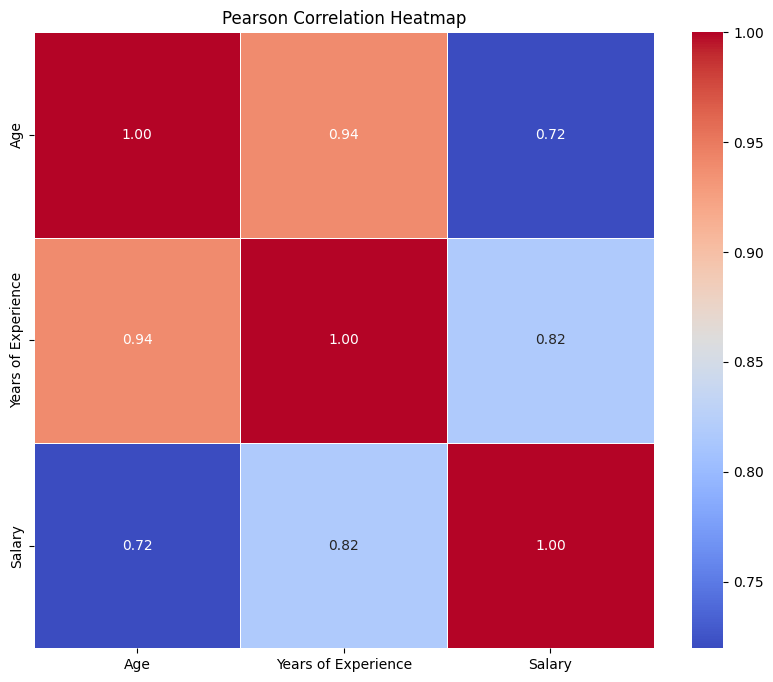

In [485]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns
selected_columns = ["Age", "Years of Experience", "Salary"]
selected_df = p1[selected_columns]

# Calculate the Pearson correlation coefficient
correlation_matrix = selected_df.corr(method='pearson')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

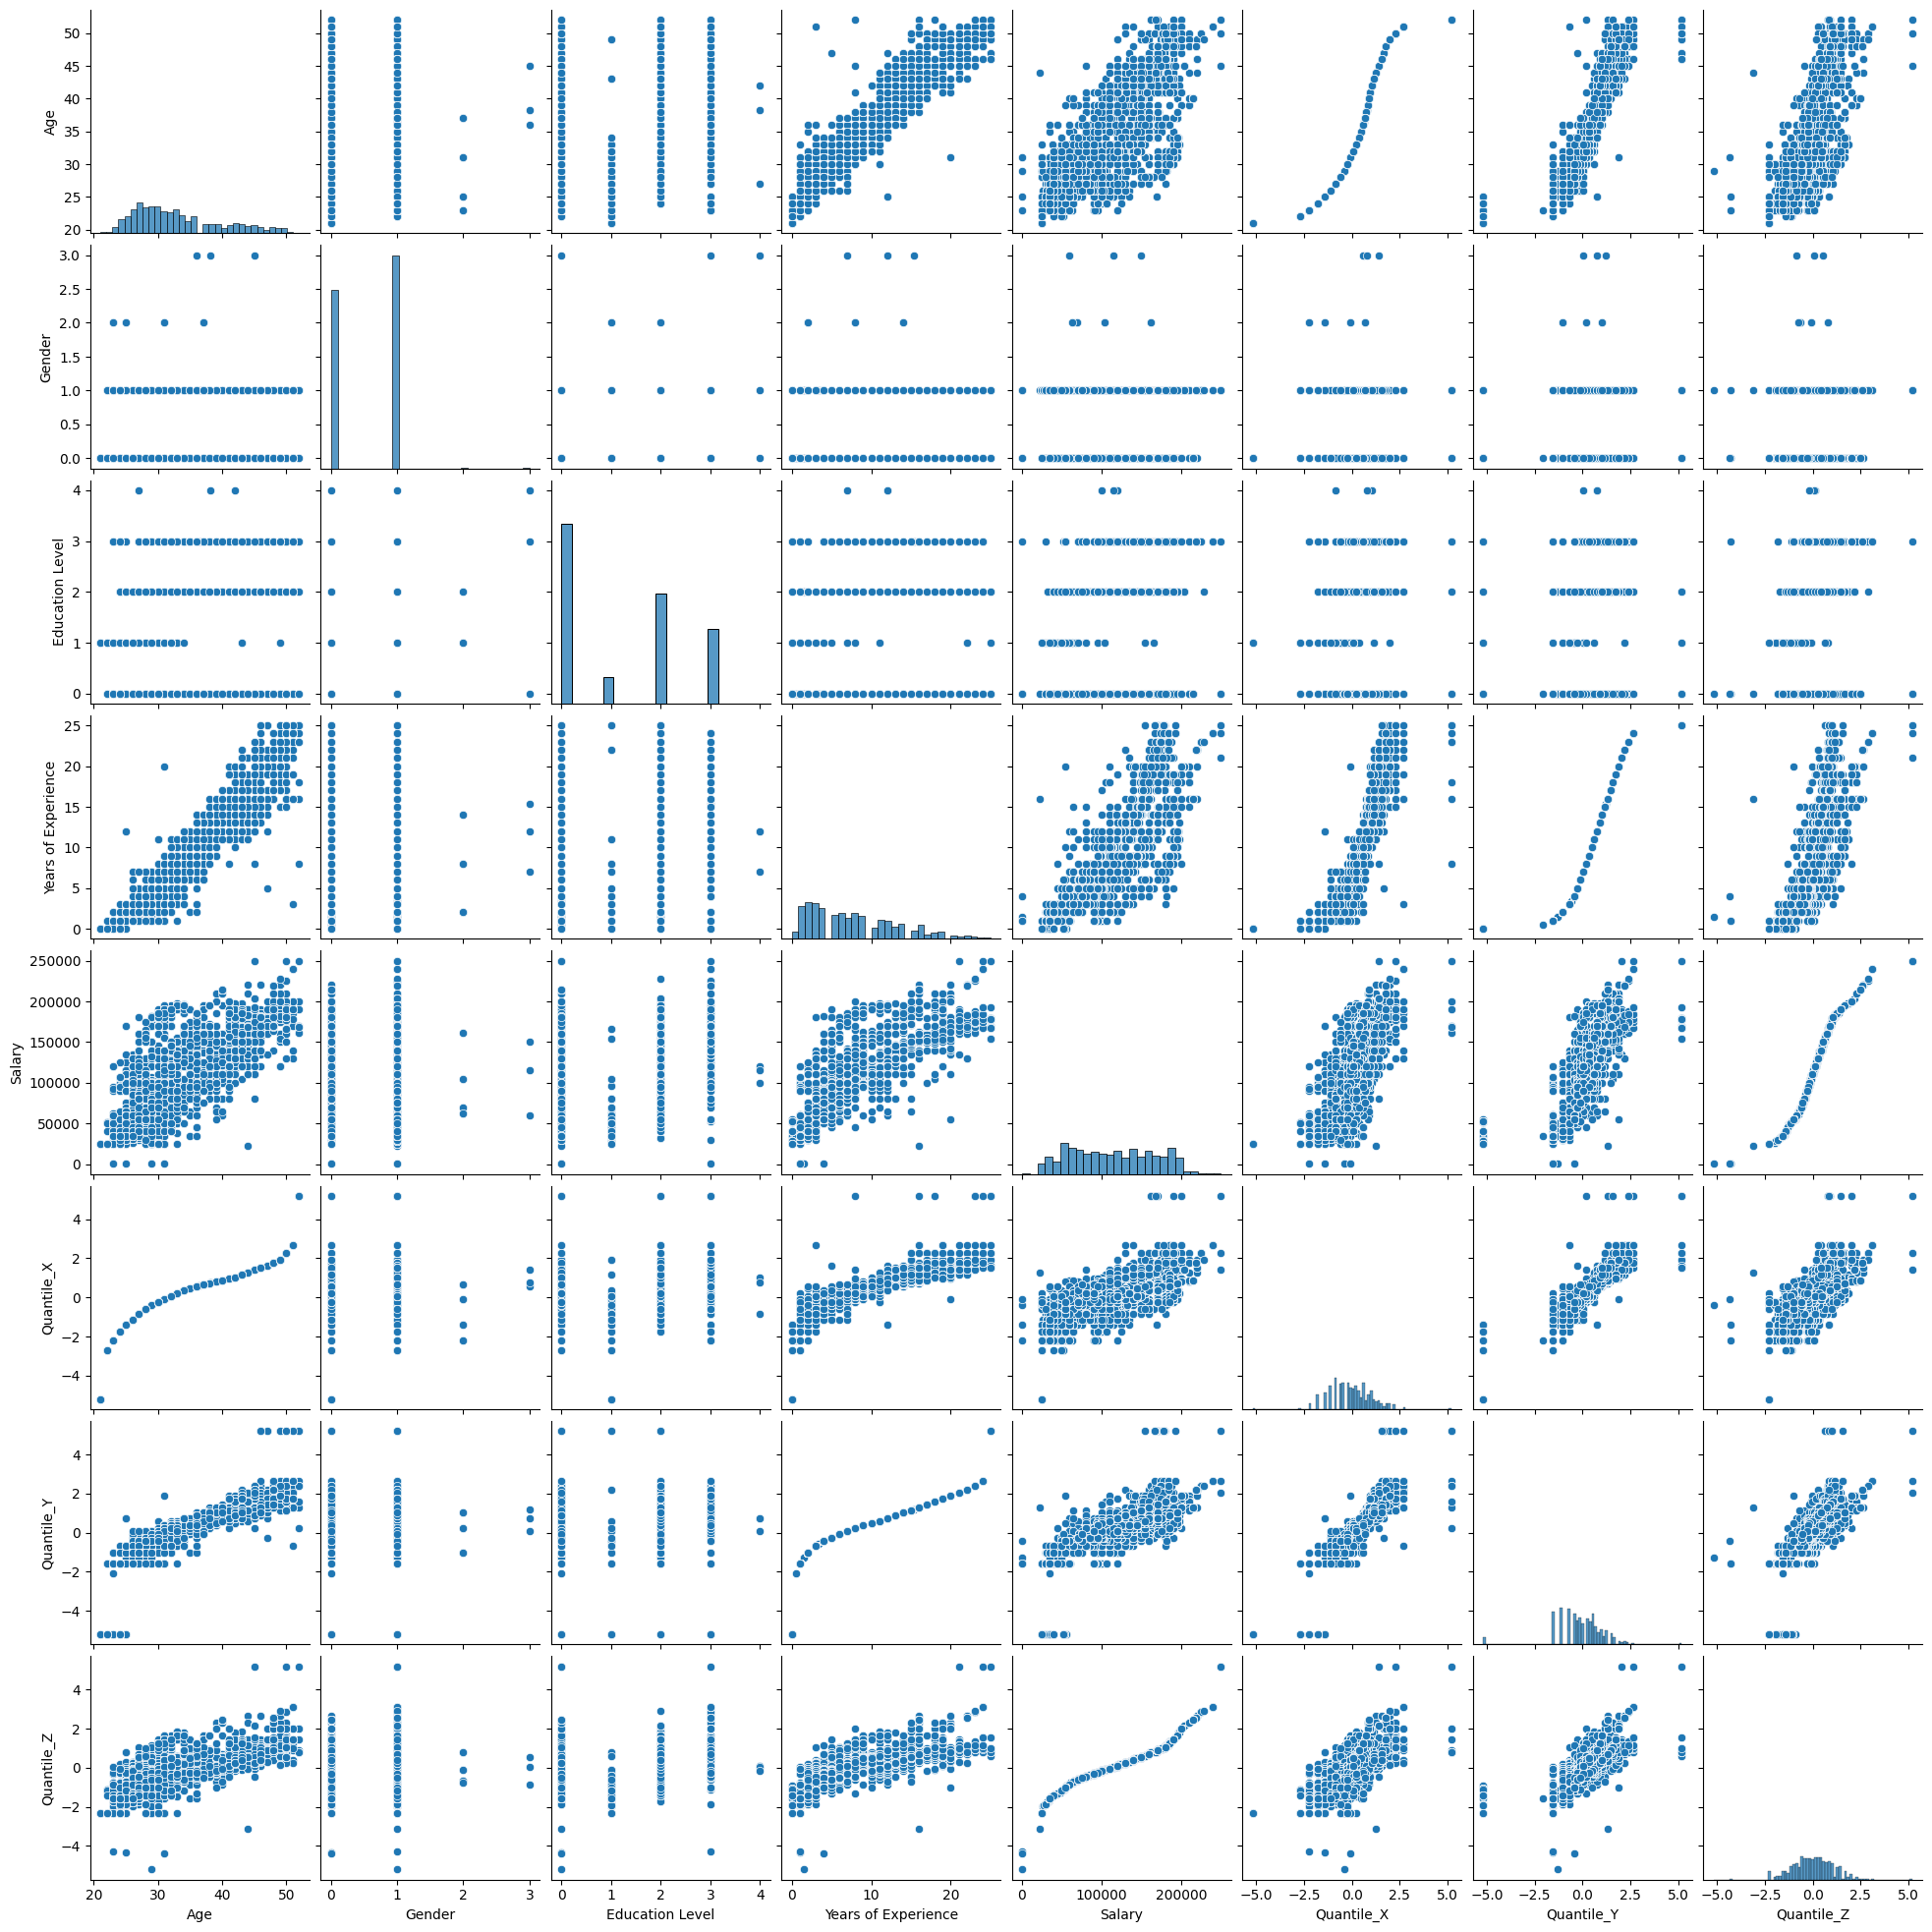

<Figure size 1800x1600 with 0 Axes>

In [486]:
sns.pairplot(p1)
plt.figure(figsize=(18, 16))
plt.show()

## Machine Learning

In [487]:
p1.head()

,Age,Gender,Education Level,Years of Experience,Salary,Quantile_X,Quantile_Y,Quantile_Z
0,32.0,1.0,0,5.0,103000.0,0.061513,-0.257495,-0.121416
1,28.0,0.0,2,3.0,65000.0,-0.604448,-0.700711,-0.723343
2,45.0,3.0,3,15.4,150000.0,1.394512,1.207012,0.551076
3,36.0,3.0,0,7.0,60000.0,0.556927,0.056486,-0.837338
4,52.0,1.0,2,8.0,200000.0,5.199338,0.208505,1.994971


In [488]:
# spilit the num column from X to Y
X = p1[['Age', 'Years of Experience']]
y = p1['Salary']

# Spilit the data into train_test
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=42)

In [489]:
X_train

,Age,Years of Experience
3845,26.0,3.0
1612,24.0,1.0
4491,45.0,20.0
107,36.0,7.0
29,33.0,6.0
...,...,...
3925,27.0,3.0
5344,23.0,0.0
5379,29.0,4.0
5543,33.0,9.0


In [490]:
y_train

3845     50000.0
1612     55000.0
4491    204000.0
107      60000.0
29       90000.0
          ...   
3925     50000.0
5344     25000.0
5379     65000.0
5543    130000.0
861     110000.0
Name: Salary, Length: 5240, dtype: float64

### Best Model Selection using Grid Search, Hyperparameter Tuning, Evaluation Metrics

In [491]:
models = {
            'Linear Regression' : (LinearRegression(), {}),
            'Decision Tree Regressor' : (DecisionTreeRegressor(), {'max_depth' : [None, 5, 10]}),
            'SVR' : (SVR(), {'kernel' :  ['rbf', 'poly', 'sigmoid']}),
            'Random Forest Regressor' : (RandomForestRegressor(), {'n_estimators' : [10, 100]}),
            'KNeighborsRegressor' : (KNeighborsRegressor(), {'n_neighbors' : np.arange(3, 100, 2)}),
            'GradientBoostingRegressor' : (GradientBoostingRegressor(), {'n_estimators' : [10, 100]}),
            'XGBRegressor' : (XGBRegressor(), {'n_estimators' : [10, 100]})
}

best_models = {}  # Dictionary to store the best model for each algorithm
best_performance = float('inf')  # Initialize with a very high value

for name, (model, params) in models.items():
    # Create a Pipeline
    pipeline = GridSearchCV(model, params, cv=5)
    
    # Fit x_train and y_train in the model 
    pipeline.fit(X_train, y_train)
    
    # Get the best parameters and the best estimator (model)
    best_params = pipeline.best_params_
    best_model = pipeline.best_estimator_
    
    # Store the best model for each algorithm
    best_models[name] = best_model
    
    # Make prediction from the best model
    y_pred = best_model.predict(X_test)
    
    # Calculate the performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Print the performance metrics
    print(name, 'Best Parameters:', best_params)
    print(name, 'MSE: ', mse)
    print(name, 'R2: ', r2)
    print(name, 'MAE: ', mae)
    print('\n')
    
    # Check if the current model performs better than the previous best model
    if mse < best_performance:
        best_performance = mse
        best_algorithm = name

# Print the name of the best performing algorithm
print("Best Performing Algorithm:", best_algorithm)


Linear Regression Best Parameters: {}
Linear Regression MSE:  916029461.4917737
Linear Regression R2:  0.6595527407626431
Linear Regression MAE:  23630.681719398617




Decision Tree Regressor Best Parameters: {'max_depth': 10}
Decision Tree Regressor MSE:  485963339.6137236
Decision Tree Regressor R2:  0.8193891200923882
Decision Tree Regressor MAE:  15563.129167773399


SVR Best Parameters: {'kernel': 'poly'}
SVR MSE:  1476437349.2623773
SVR R2:  0.45127414551332234
SVR MAE:  30941.12073525833


Random Forest Regressor Best Parameters: {'n_estimators': 100}
Random Forest Regressor MSE:  487008190.35391414
Random Forest Regressor R2:  0.8190007957144465
Random Forest Regressor MAE:  15561.621786471616


KNeighborsRegressor Best Parameters: {'n_neighbors': 19}
KNeighborsRegressor MSE:  512696073.87271476
KNeighborsRegressor R2:  0.8094537561188617
KNeighborsRegressor MAE:  16433.72787464845


GradientBoostingRegressor Best Parameters: {'n_estimators': 100}
GradientBoostingRegressor MSE:  535294744.01780164
GradientBoostingRegressor R2:  0.8010548392316531
GradientBoostingRegressor MAE:  17787.85754296314


XGBRegressor Best Parameters: {'n_estimators'

### Model Fitting

In [492]:
model_fit = DecisionTreeRegressor()
model_fit.fit(X_train, y_train)

DecisionTreeRegressor()

### Prediction

In [493]:
model_fit.predict([[42,  4]])

array([65000.])

In [494]:
model_fit.predict([[42,   13]])

array([150054.05405405])